In [17]:
from __future__ import unicode_literals
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
from wordcloud import WordCloud
import textwrap
from PIL import Image
import mplcursors
import plotly.express as px
from termcolor import colored
import seaborn as sns

In [18]:
data=pd.read_csv('kluczowe_sienkiewicz.csv')

In [19]:
data.head()

,Lemat,Istotność,Frekwencja
0,Winicjusz,31.400637,986
1,Ligia,27.037012,731
2,rzec,24.927009,650
3,cezar,24.738917,614
4,Petroniusz,24.527587,602


In [20]:
df = pd.DataFrame(data[:20])

In [21]:
fig = px.bar(df, x='Lemat', y='Istotność', hover_data=['Frekwencja'])
fig.update_layout(
    showlegend=True,
    title_text="Słowa kluczowe wg istotności",
    height=500,
    width=800,
)
fig.show()

In [22]:
df = pd.DataFrame(data)
data = dict(zip(df['Lemat'].tolist(), df['Istotność'].tolist()))

In [23]:
cloud_mask = np.array(Image.open('cloudmask.png'))
wc = WordCloud(width=1200,height=600,max_words=200,background_color='white',mask=cloud_mask).generate_from_frequencies(data)

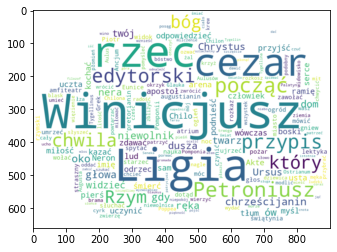

In [24]:
plt.imshow(wc, interpolation='bilinear')

In [25]:
f=codecs.open('sienkiewicz.txt', 'r', 'utf-8')
text_data = f.read()

In [26]:
text_data_copy = text_data
text=[]
segments_list=[]
n=14500
while(len(text_data_copy.split())>=n):
    for word in text_data_copy.split():
        text.append(word)
    topn = text[:n]
    str2 = ' '.join(topn)
    segments_list.append(str2)
    text_data_copy = ' '.join(text_data_copy.split()[n:])
    text.clear()

In [27]:
import collections
my_lists = collections.defaultdict(list)
terms = ['Winicjusz', 'cezar', 'Petroniusz']
array_name = "array"
d = {}
for i in range(len(terms)):
    array_i = array_name + f'{i}'
    for j in segments_list:
        my_lists[array_i].append(j.count(terms[i]))
    s = pd.Series(my_lists[array_i])
    d[terms[i]] = s

In [28]:
df_segments=pd.DataFrame(d)
df_segments

,Winicjusz,cezar,Petroniusz
0,76,59,104
1,77,80,39
2,93,42,94
3,93,16,9
4,123,13,9
5,89,44,48
6,58,65,54
7,109,32,21
8,92,66,86
9,98,40,53


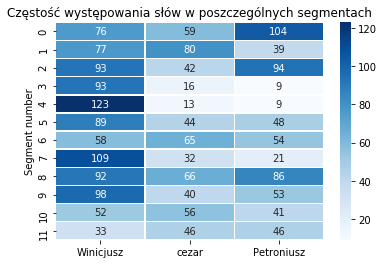

In [33]:
fig=sns.heatmap(df_segments, annot=True, fmt="d", linewidths=.5, cmap='Blues')
plt.ylabel("Segment number")
plt.title("Częstość występowania słów w poszczególnych segmentach")
plt.show(fig)

Text(0, 0.5, 'liczność słowa')

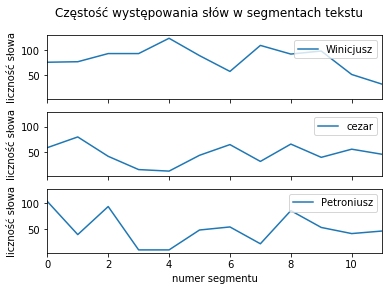

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all', sharey='all')
fig.suptitle("Częstość występowania słów w segmentach tekstu")
line1=df_segments[terms[0]].plot(ax=axes[0], label=terms[0])
line2=df_segments[terms[1]].plot(ax=axes[1], label=terms[1])
line3=df_segments[terms[2]].plot(ax=axes[2], label=terms[2])
line1.legend(loc="upper right")
line2.legend(loc="upper right")
line3.legend(loc="upper right")
line1.set_xlabel("numer segmentu")
line2.set_xlabel("numer segmentu")
line3.set_xlabel("numer segmentu")
line1.set_ylabel("liczność słowa")
line2.set_ylabel("liczność słowa")
line3.set_ylabel("liczność słowa")

Text(0, 0.5, 'skumulowana liczba wystąpień słów')

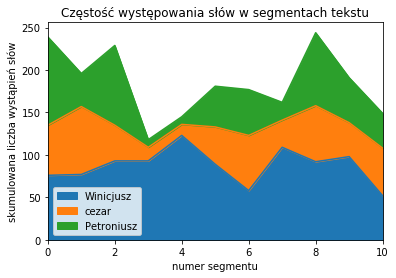

In [31]:
ax = df_segments[:11].plot(kind='area', title='Częstość występowania słów w segmentach tekstu')
ax.set_xlabel("numer segmentu")
ax.set_ylabel("skumulowana liczba wystąpień słów")

Text(0, 0.5, 'numer segmentu')

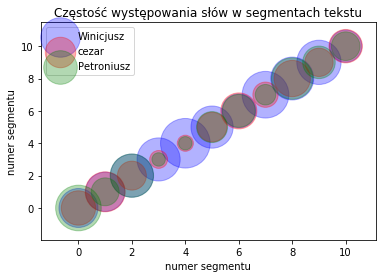

In [32]:
segment_no = range(0, len(segments_list)-1)
plt.scatter(segment_no, segment_no, s=df_segments[terms[0]]*20, alpha=0.3, color='b', label=terms[0])
plt.scatter(segment_no, segment_no, s=df_segments[terms[1]]*20, alpha=0.3, color='r', label=terms[1])
plt.scatter(segment_no, segment_no, s=df_segments[terms[2]]*20, alpha=0.3, color='g', label=terms[2])
plt.title("Częstość występowania słów w segmentach tekstu")
plt.legend()
plt.xlabel('numer segmentu')
plt.ylabel('numer segmentu')